# Project Summary

This Jupyter Notebook analyzes migration and economic freedom data. The workflow includes the following steps:

1. **Data Import and Preparation:**
    - Import necessary libraries (`pandas` and `matplotlib.pyplot`).
    - Load per capita immigration data from `Resources/share-of-the-population-that-was-born-in-another-country.csv` into `immigration_df`.
    - Rename columns for clarity.
    - Pivot the data to have years as columns and countries as rows.

2. **Emigration Data:**
    - Load per capita emigration data from `Resources/share-of-the-population-that-has-left-the-country.csv` into `emigration_df`.
    - Rename columns for clarity.
    - Pivot the data to have years as columns and countries as rows.

3. **Combining Data:**
    - Join immigration and emigration data into a single dataframe `migration_df`.

4. **Economic Freedom Data:**
    - Load economic freedom data from `Resources/efotw-2024-master-index-data-for-researchers-iso.csv` into `eco_free_df`.
    - Keep only relevant columns and rename them.
    - Filter data for specific years and pivot it to have years as columns and countries as rows.

5. **Final Data Preparation:**
    - Join the migration data with economic freedom data into a final dataframe `df`.
    - Export and re-import the data to ensure column names are correct.
    - Handle missing values by creating a separate dataframe `df_null` and exporting it.
    - Exclude countries with missing data for specific years and export the list of excluded countries.
    - Drop rows with null values to create `final_df`.

6. **Analysis and Visualization:**
    - Calculate net migration for each year.
    - Plot net migration for all years and specific years against economic freedom scores.
    - Create a correlation matrix and scatter matrix to analyze relationships between variables.

This workflow provides a comprehensive analysis of migration patterns and their relationship with economic freedom scores across different countries and years.

In [2]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#Importing the immigration data and creating a dataframe
immigration_csv = 'Resources/share-of-the-population-that-was-born-in-another-country.csv'
immigration_df = pd.read_csv(immigration_csv)
immigration_df

,Entity,Year,Share of the population that was born in another country
0,Afghanistan,1990,0.464748
1,Afghanistan,1995,0.394917
2,Afghanistan,2000,0.365338
3,Afghanistan,2005,0.340349
4,Afghanistan,2010,0.350434
...,...,...,...
1926,Zimbabwe,2000,3.451665
1927,Zimbabwe,2005,3.330596
1928,Zimbabwe,2010,3.136837
1929,Zimbabwe,2015,2.898968


In [ ]:
#Rename entity to country and 'Share of the population that was born in another country' to 'Immigrants'.
immigration_df = immigration_df.rename(columns={'Entity':'Country', 'Share of the population that was born in another country':'Immigrants'})

In [10]:
#Previewing the dataframe
immigration_df.head()

,Country,Year,Immigrants
0,Afghanistan,1990,0.464748
1,Afghanistan,1995,0.394917
2,Afghanistan,2000,0.365338
3,Afghanistan,2005,0.340349
4,Afghanistan,2010,0.350434


In [11]:
#Grouping by country and moving the years to columns with the values as the values
immigration_df = immigration_df.pivot(index='Country', columns='Year', values='Immigrants')
immigration_df



Year,1990,1995,2000,2005,2010,2015,2020
Country,,,,,,,
Afghanistan,0.464748,0.394917,0.365338,0.340349,0.350434,0.986331,0.370162
Africa,2.489042,2.280463,1.855977,1.750806,1.713327,1.933359,1.893891
Albania,2.008874,2.292187,2.450910,2.097278,1.790484,1.800054,1.696087
Algeria,1.063533,0.911169,0.805709,0.596470,0.603900,0.602781,0.570974
American Samoa,44.947308,43.451595,43.088417,40.688750,41.999500,42.133460,42.770440
...,...,...,...,...,...,...,...
Western Sahara,1.237239,1.169245,1.047065,0.889339,0.935519,0.984206,0.908041
World,2.871776,2.807869,2.819740,2.926468,3.176496,3.359966,3.599812
Yemen,1.015057,0.915390,0.832554,0.854764,1.245501,1.433632,1.297906


In [12]:
#Importing the emigration data and creating a dataframe
emigration_csv = 'Resources/share-of-the-population-that-has-left-the-country.csv'
emigration_df = pd.read_csv(emigration_csv)
emigration_df

,Entity,Year,Share of the population that was born in this country but now lives in another country.
0,Afghanistan,1990,61.870690
1,Afghanistan,1995,24.002707
2,Afghanistan,2000,22.861822
3,Afghanistan,2005,16.046991
4,Afghanistan,2010,18.055254
...,...,...,...
1962,Zimbabwe,2000,2.962467
1963,Zimbabwe,2005,4.146605
1964,Zimbabwe,2010,5.943134
1965,Zimbabwe,2015,8.448022


In [13]:
#Renaming 'Entity' to 'Country' and 'Share of the population that was born in this country but now lives in another country.' to 'Emigrants'
emigration_df = emigration_df.rename(columns={'Entity':'Country', 'Share of the population that was born in this country but now lives in another country.':'Emigrants'})

In [14]:
#Previewing the dataframe
emigration_df.head()

,Country,Year,Emigrants
0,Afghanistan,1990,61.870690
1,Afghanistan,1995,24.002707
2,Afghanistan,2000,22.861822
3,Afghanistan,2005,16.046991
4,Afghanistan,2010,18.055254


In [15]:
#Grouping by Country and moving the years to columns with the values as the values
emigration_df = emigration_df.pivot(index='Country', columns='Year', values='Emigrants')
emigration_df


Year,1990,1995,2000,2005,2010,2015,2020
Country,,,,,,,
Afghanistan,61.870690,24.002707,22.861822,16.046991,18.055254,15.694132,15.037472
Africa,3.271432,3.114781,2.722618,2.755148,2.808981,2.969453,3.026050
Albania,5.483876,16.096317,26.346346,31.295479,37.921608,39.537610,43.451630
Algeria,3.578049,3.406524,3.343783,4.825522,4.600838,4.622687,4.611833
American Samoa,4.310363,4.962565,5.510585,4.345417,3.846017,3.513959,3.319021
...,...,...,...,...,...,...,...
Western Sahara,77.436966,65.384630,52.865820,30.007590,35.437504,35.325184,32.633890
World,2.871776,2.807869,2.819740,2.926468,3.176496,3.359966,3.599812
Yemen,3.889774,3.260503,3.040920,3.127547,3.784878,4.133312,4.362527


In [16]:
# Joining the immigration and emigration data where the left suffix is '_immigrants' and right suffix is '_emigrants'. 
migration_df = immigration_df.join(emigration_df, lsuffix='_immigrants', rsuffix='_emigrants')
migration_df

Year,1990_immigrants,1995_immigrants,2000_immigrants,2005_immigrants,2010_immigrants,2015_immigrants,2020_immigrants,1990_emigrants,1995_emigrants,2000_emigrants,2005_emigrants,2010_emigrants,2015_emigrants,2020_emigrants
Country,,,,,,,,,,,,,,
Afghanistan,0.464748,0.394917,0.365338,0.340349,0.350434,0.986331,0.370162,61.870690,24.002707,22.861822,16.046991,18.055254,15.694132,15.037472
Africa,2.489042,2.280463,1.855977,1.750806,1.713327,1.933359,1.893891,3.271432,3.114781,2.722618,2.755148,2.808981,2.969453,3.026050
Albania,2.008874,2.292187,2.450910,2.097278,1.790484,1.800054,1.696087,5.483876,16.096317,26.346346,31.295479,37.921608,39.537610,43.451630
Algeria,1.063533,0.911169,0.805709,0.596470,0.603900,0.602781,0.570974,3.578049,3.406524,3.343783,4.825522,4.600838,4.622687,4.611833
American Samoa,44.947308,43.451595,43.088417,40.688750,41.999500,42.133460,42.770440,4.310363,4.962565,5.510585,4.345417,3.846017,3.513959,3.319021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,1.237239,1.169245,1.047065,0.889339,0.935519,0.984206,0.908041,77.436966,65.384630,52.865820,30.007590,35.437504,35.325184,32.633890
World,2.871776,2.807869,2.819740,2.926468,3.176496,3.359966,3.599812,2.871776,2.807869,2.819740,2.926468,3.176496,3.359966,3.599812
Yemen,1.015057,0.915390,0.832554,0.854764,1.245501,1.433632,1.297906,3.889774,3.260503,3.040920,3.127547,3.784878,4.133312,4.362527


In [17]:
#Importing the economic freedom data and creating a dataframe
eco_free_path = "Resources/efotw-2024-master-index-data-for-researchers-iso.csv"
eco_free_df = pd.read_csv(eco_free_path)
eco_free_df

,ISO_Code,Countries,Year,Summary,Area 1,Area 2,Area 3,Area 4,Area 5,Standard Deviation of the 5 EFW Areas
0,ALB,Albania,2022,7.48,7.81,5.43,8.76,8.53,6.90,1.36
1,DZA,Algeria,2022,4.46,4.45,3.82,6.37,3.14,4.51,1.21
2,AGO,Angola,2022,4.79,7.50,3.17,5.00,2.97,5.30,1.84
3,ARG,Argentina,2022,4.55,6.22,4.95,2.55,4.22,4.80,1.34
4,ARM,Armenia,2022,7.49,8.01,5.81,8.47,8.08,7.10,1.06
...,...,...,...,...,...,...,...,...,...,...
4780,VEN,"Venezuela, RB",1970,6.54,7.64,4.51,9.59,7.01,4.54,2.17
4781,VNM,Vietnam,1970,NaN,NaN,4.71,NaN,NaN,NaN,NaN
4782,YEM,"Yemen, Rep.",1970,NaN,NaN,2.63,NaN,NaN,NaN,NaN
4783,ZMB,Zambia,1970,3.98,5.33,3.68,5.14,NaN,3.26,1.04


In [18]:
#Keeping only the columns we need and renaming Summary to efScore
eco_free_df = eco_free_df[['Countries', 'Year', 'Summary']]
eco_free_df = eco_free_df.rename(columns={'Countries':'Country', 'Summary':'efScore'})
eco_free_df

,Country,Year,efScore
0,Albania,2022,7.48
1,Algeria,2022,4.46
2,Angola,2022,4.79
3,Argentina,2022,4.55
4,Armenia,2022,7.49
...,...,...,...
4780,"Venezuela, RB",1970,6.54
4781,Vietnam,1970,NaN
4782,"Yemen, Rep.",1970,NaN
4783,Zambia,1970,3.98


In [19]:
#Keeping only lines with year 1990, 1995, 2000, 2005, 2010, 2015, and 2020
years = [1990, 1995, 2000, 2005, 2010, 2015, 2020]
eco_free_df = eco_free_df[eco_free_df['Year'].isin(years)]
eco_free_df

,Country,Year,efScore
330,Albania,2020,7.57
331,Algeria,2020,4.92
332,Angola,2020,5.31
333,Argentina,2020,4.50
334,Armenia,2020,7.55
...,...,...,...
4120,"Venezuela, RB",1990,4.98
4121,Vietnam,1990,NaN
4122,"Yemen, Rep.",1990,NaN
4123,Zambia,1990,2.88


In [20]:
#Grouping by Country and move the years to columns with the values as the values
eco_free_df = eco_free_df.pivot(index='Country', columns='Year', values='efScore')
eco_free_df

Year,1990,1995,2000,2005,2010,2015,2020
Country,,,,,,,
Albania,5.22,5.69,6.35,7.14,7.35,7.64,7.57
Algeria,3.61,3.96,4.88,5.37,4.99,4.68,4.92
Angola,NaN,NaN,4.17,3.72,4.86,5.25,5.31
Argentina,4.51,6.49,7.15,6.03,5.63,4.95,4.50
Armenia,NaN,NaN,5.55,7.30,7.27,7.43,7.55
...,...,...,...,...,...,...,...
"Venezuela, RB",4.98,4.27,5.42,4.31,3.26,2.80,2.96
Vietnam,NaN,NaN,5.40,5.59,5.53,5.78,6.16
"Yemen, Rep.",NaN,NaN,4.38,4.57,5.88,5.35,4.61


In [22]:
#Joining the migration and economic freedom data where the left suffix is '' and right suffix is '_efScore'
#Note: this didn't work as expected. Attempted to manually rename the columns and that didn't work either.
df = migration_df.join(eco_free_df, lsuffix='', rsuffix='_efScore')
df = df.rename(columns={'1990':'1990_efScore', '1995':'1995_efScore', '2000':'2000_efScore', '2005':'2005_efScore', '2010':'2010_efScore', '2015':'2015_efScore', '2020':'2020_efScore'})
df

Year,1990_immigrants,1995_immigrants,2000_immigrants,2005_immigrants,2010_immigrants,2015_immigrants,2020_immigrants,1990_emigrants,1995_emigrants,2000_emigrants,...,2010_emigrants,2015_emigrants,2020_emigrants,1990,1995,2000,2005,2010,2015,2020
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.464748,0.394917,0.365338,0.340349,0.350434,0.986331,0.370162,61.870690,24.002707,22.861822,...,18.055254,15.694132,15.037472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa,2.489042,2.280463,1.855977,1.750806,1.713327,1.933359,1.893891,3.271432,3.114781,2.722618,...,2.808981,2.969453,3.026050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,2.008874,2.292187,2.450910,2.097278,1.790484,1.800054,1.696087,5.483876,16.096317,26.346346,...,37.921608,39.537610,43.451630,5.22,5.69,6.35,7.14,7.35,7.64,7.57
Algeria,1.063533,0.911169,0.805709,0.596470,0.603900,0.602781,0.570974,3.578049,3.406524,3.343783,...,4.600838,4.622687,4.611833,3.61,3.96,4.88,5.37,4.99,4.68,4.92
American Samoa,44.947308,43.451595,43.088417,40.688750,41.999500,42.133460,42.770440,4.310363,4.962565,5.510585,...,3.846017,3.513959,3.319021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,1.237239,1.169245,1.047065,0.889339,0.935519,0.984206,0.908041,77.436966,65.384630,52.865820,...,35.437504,35.325184,32.633890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
World,2.871776,2.807869,2.819740,2.926468,3.176496,3.359966,3.599812,2.871776,2.807869,2.819740,...,3.176496,3.359966,3.599812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,1.015057,0.915390,0.832554,0.854764,1.245501,1.433632,1.297906,3.889774,3.260503,3.040920,...,3.784878,4.133312,4.362527,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Exporting the data to a csv file because the column names didn't change properly.. at this point, I manually changed the column names in the csv file itself.
df.to_csv('Resources/migration_efScore.csv')

In [17]:
#Loading the csv file back in to see if the column names changed properly
newfile = 'Resources/migration_efScore.csv'
df = pd.read_csv(newfile)
df

,Country,1990_immigrants,1995_immigrants,2000_immigrants,2005_immigrants,2010_immigrants,2015_immigrants,2020_immigrants,1990_emigrants,1995_emigrants,...,2010_emigrants,2015_emigrants,2020_emigrants,1990_efScore,1995_efScore,2000_efScore,2005_efScore,2010_efScore,2015_efScore,2020_efScore
0,Afghanistan,0.464748,0.394917,0.365338,0.340349,0.350434,0.986331,0.370162,61.870690,24.002707,...,18.055254,15.694132,15.037472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,2.489042,2.280463,1.855977,1.750806,1.713327,1.933359,1.893891,3.271432,3.114781,...,2.808981,2.969453,3.026050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,2.008874,2.292187,2.450910,2.097278,1.790484,1.800054,1.696087,5.483876,16.096317,...,37.921608,39.537610,43.451630,5.22,5.69,6.35,7.14,7.35,7.64,7.57
3,Algeria,1.063533,0.911169,0.805709,0.596470,0.603900,0.602781,0.570974,3.578049,3.406524,...,4.600838,4.622687,4.611833,3.61,3.96,4.88,5.37,4.99,4.68,4.92
4,American Samoa,44.947308,43.451595,43.088417,40.688750,41.999500,42.133460,42.770440,4.310363,4.962565,...,3.846017,3.513959,3.319021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Western Sahara,1.237239,1.169245,1.047065,0.889339,0.935519,0.984206,0.908041,77.436966,65.384630,...,35.437504,35.325184,32.633890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,World,2.871776,2.807869,2.819740,2.926468,3.176496,3.359966,3.599812,2.871776,2.807869,...,3.176496,3.359966,3.599812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,Yemen,1.015057,0.915390,0.832554,0.854764,1.245501,1.433632,1.297906,3.889774,3.260503,...,3.784878,4.133312,4.362527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,Zambia,3.477271,2.686034,3.299778,2.133011,1.102177,0.831941,1.022386,1.060129,1.548874,...,1.343276,1.161072,1.091713,2.88,4.31,5.91,6.09,6.51,6.24,5.89


In [18]:
#We want to review what exactly will be dropped if we drop any rows with null values, so we creating a new dataframe with only the rows that have null values.
df_null = df[df.isnull().any(axis=1)]
df_null

,Country,1990_immigrants,1995_immigrants,2000_immigrants,2005_immigrants,2010_immigrants,2015_immigrants,2020_immigrants,1990_emigrants,1995_emigrants,...,2010_emigrants,2015_emigrants,2020_emigrants,1990_efScore,1995_efScore,2000_efScore,2005_efScore,2010_efScore,2015_efScore,2020_efScore
0,Afghanistan,0.464748,0.394917,0.365338,0.340349,0.350434,0.986331,0.370162,61.870690,24.002707,...,18.055254,15.694132,15.037472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,2.489042,2.280463,1.855977,1.750806,1.713327,1.933359,1.893891,3.271432,3.114781,...,2.808981,2.969453,3.026050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,American Samoa,44.947308,43.451595,43.088417,40.688750,41.999500,42.133460,42.770440,4.310363,4.962565,...,3.846017,3.513959,3.319021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Andorra,71.349160,69.223305,64.454810,63.772488,61.634735,54.189480,58.984016,6.861378,6.486063,...,9.364861,11.206135,14.407558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Angola,0.282882,0.285496,0.281224,0.320738,1.440159,2.267140,1.997288,6.962012,4.937762,...,2.788903,2.217327,2.032680,NaN,NaN,4.17,3.72,4.86,5.25,5.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,Western Asia,10.252086,10.098206,9.981072,10.418195,13.202621,15.484522,16.664410,7.469585,7.330173,...,6.910822,8.418627,9.040726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,Western Europe,9.473481,10.397531,11.429487,11.974103,12.765500,13.493314,16.942003,3.475893,3.540799,...,4.372729,4.370338,4.678864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Western Sahara,1.237239,1.169245,1.047065,0.889339,0.935519,0.984206,0.908041,77.436966,65.384630,...,35.437504,35.325184,32.633890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,World,2.871776,2.807869,2.819740,2.926468,3.176496,3.359966,3.599812,2.871776,2.807869,...,3.176496,3.359966,3.599812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Resetting the for the null dataframe and exporting it to a csv file for further review.
df_null.reset_index(inplace=True, drop=True)
df_null.to_csv('Resources/migration_efScore_null.csv')
df_null

,Country,1990_immigrants,1995_immigrants,2000_immigrants,2005_immigrants,2010_immigrants,2015_immigrants,2020_immigrants,1990_emigrants,1995_emigrants,...,2010_emigrants,2015_emigrants,2020_emigrants,1990_efScore,1995_efScore,2000_efScore,2005_efScore,2010_efScore,2015_efScore,2020_efScore
0,Afghanistan,0.464748,0.394917,0.365338,0.340349,0.350434,0.986331,0.370162,61.870690,24.002707,...,18.055254,15.694132,15.037472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,2.489042,2.280463,1.855977,1.750806,1.713327,1.933359,1.893891,3.271432,3.114781,...,2.808981,2.969453,3.026050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,American Samoa,44.947308,43.451595,43.088417,40.688750,41.999500,42.133460,42.770440,4.310363,4.962565,...,3.846017,3.513959,3.319021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andorra,71.349160,69.223305,64.454810,63.772488,61.634735,54.189480,58.984016,6.861378,6.486063,...,9.364861,11.206135,14.407558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,0.282882,0.285496,0.281224,0.320738,1.440159,2.267140,1.997288,6.962012,4.937762,...,2.788903,2.217327,2.032680,NaN,NaN,4.17,3.72,4.86,5.25,5.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Western Asia,10.252086,10.098206,9.981072,10.418195,13.202621,15.484522,16.664410,7.469585,7.330173,...,6.910822,8.418627,9.040726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,Western Europe,9.473481,10.397531,11.429487,11.974103,12.765500,13.493314,16.942003,3.475893,3.540799,...,4.372729,4.370338,4.678864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,Western Sahara,1.237239,1.169245,1.047065,0.889339,0.935519,0.984206,0.908041,77.436966,65.384630,...,35.437504,35.325184,32.633890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,World,2.871776,2.807869,2.819740,2.926468,3.176496,3.359966,3.599812,2.871776,2.807869,...,3.176496,3.359966,3.599812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Inspecting the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          278 non-null    object 
 1   1990_immigrants  274 non-null    float64
 2   1995_immigrants  274 non-null    float64
 3   2000_immigrants  274 non-null    float64
 4   2005_immigrants  275 non-null    float64
 5   2010_immigrants  278 non-null    float64
 6   2015_immigrants  278 non-null    float64
 7   2020_immigrants  278 non-null    float64
 8   1990_emigrants   278 non-null    float64
 9   1995_emigrants   278 non-null    float64
 10  2000_emigrants   278 non-null    float64
 11  2005_emigrants   278 non-null    float64
 12  2010_emigrants   278 non-null    float64
 13  2015_emigrants   278 non-null    float64
 14  2020_emigrants   278 non-null    float64
 15  1990_efScore     104 non-null    float64
 16  1995_efScore     109 non-null    float64
 17  2000_efScore    

## Analysis

There are a lot of countries only missing 1990 and 1995 data. I'm going to exclude that and see if we get a better set.

In [21]:
#Removing 1990 and 1995 columns
del df['1990_immigrants']
del df['1990_emigrants']
del df['1990_efScore']
del df['1995_immigrants']
del df['1995_emigrants']
del df['1995_efScore']

df

,Country,2000_immigrants,2005_immigrants,2010_immigrants,2015_immigrants,2020_immigrants,2000_emigrants,2005_emigrants,2010_emigrants,2015_emigrants,2020_emigrants,2000_efScore,2005_efScore,2010_efScore,2015_efScore,2020_efScore
0,Afghanistan,0.365338,0.340349,0.350434,0.986331,0.370162,22.861822,16.046991,18.055254,15.694132,15.037472,NaN,NaN,NaN,NaN,NaN
1,Africa,1.855977,1.750806,1.713327,1.933359,1.893891,2.722618,2.755148,2.808981,2.969453,3.026050,NaN,NaN,NaN,NaN,NaN
2,Albania,2.450910,2.097278,1.790484,1.800054,1.696087,26.346346,31.295479,37.921608,39.537610,43.451630,6.35,7.14,7.35,7.64,7.57
3,Algeria,0.805709,0.596470,0.603900,0.602781,0.570974,3.343783,4.825522,4.600838,4.622687,4.611833,4.88,5.37,4.99,4.68,4.92
4,American Samoa,43.088417,40.688750,41.999500,42.133460,42.770440,5.510585,4.345417,3.846017,3.513959,3.319021,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Western Sahara,1.047065,0.889339,0.935519,0.984206,0.908041,52.865820,30.007590,35.437504,35.325184,32.633890,NaN,NaN,NaN,NaN,NaN
274,World,2.819740,2.926468,3.176496,3.359966,3.599812,2.819740,2.926468,3.176496,3.359966,3.599812,NaN,NaN,NaN,NaN,NaN
275,Yemen,0.832554,0.854764,1.245501,1.433632,1.297906,3.040920,3.127547,3.784878,4.133312,4.362527,NaN,NaN,NaN,NaN,NaN
276,Zambia,3.299778,2.133011,1.102177,0.831941,1.022386,1.538037,1.530830,1.343276,1.161072,1.091713,5.91,6.09,6.51,6.24,5.89


In [22]:
#Creating a new null dataframe to compare what rows will be dropped if we drop any rows with null values
df_null = df[df.isnull().any(axis=1)]
df_null

,Country,2000_immigrants,2005_immigrants,2010_immigrants,2015_immigrants,2020_immigrants,2000_emigrants,2005_emigrants,2010_emigrants,2015_emigrants,2020_emigrants,2000_efScore,2005_efScore,2010_efScore,2015_efScore,2020_efScore
0,Afghanistan,0.365338,0.340349,0.350434,0.986331,0.370162,22.861822,16.046991,18.055254,15.694132,15.037472,NaN,NaN,NaN,NaN,NaN
1,Africa,1.855977,1.750806,1.713327,1.933359,1.893891,2.722618,2.755148,2.808981,2.969453,3.026050,NaN,NaN,NaN,NaN,NaN
4,American Samoa,43.088417,40.688750,41.999500,42.133460,42.770440,5.510585,4.345417,3.846017,3.513959,3.319021,NaN,NaN,NaN,NaN,NaN
5,Andorra,64.454810,63.772488,61.634735,54.189480,58.984016,8.525768,7.261224,9.364861,11.206135,14.407558,NaN,NaN,NaN,NaN,NaN
7,Anguilla,36.125190,37.646680,37.980053,38.315006,38.094920,22.299280,19.490435,16.917238,17.879402,16.697773,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,Western Asia,9.981072,10.418195,13.202621,15.484522,16.664410,7.041151,6.762542,6.910822,8.418627,9.040726,NaN,NaN,NaN,NaN,NaN
272,Western Europe,11.429487,11.974103,12.765500,13.493314,16.942003,3.747554,4.018694,4.372729,4.370338,4.678864,NaN,NaN,NaN,NaN,NaN
273,Western Sahara,1.047065,0.889339,0.935519,0.984206,0.908041,52.865820,30.007590,35.437504,35.325184,32.633890,NaN,NaN,NaN,NaN,NaN
274,World,2.819740,2.926468,3.176496,3.359966,3.599812,2.819740,2.926468,3.176496,3.359966,3.599812,NaN,NaN,NaN,NaN,NaN


In [23]:
#Making a series with countries that have null values
excluded_countries = df_null['Country']
excluded_countries.reset_index(drop=True, inplace=True)
excluded_countries

0         Afghanistan
1              Africa
2      American Samoa
3             Andorra
4            Anguilla
            ...      
137      Western Asia
138    Western Europe
139    Western Sahara
140             World
141             Yemen
Name: Country, Length: 142, dtype: object

## Analysis of Excluded 'Countries'

These entries were excluded from the economic freedom and emigration analysis primarily because **they lacked consistent or complete data** (for example, missing Economic Freedom Index scores or emigration/immigration data) or **they represented regions or territories** rather than a single, internationally recognized country with robust data. Many are broad geographic groupings (e.g., “Africa,” “Eastern Europe,” “Oceania”) or **smaller territories** (e.g., “Andorra,” “Liechtenstein,” “Turks and Caicos Islands”)—places that often **do not appear in global datasets** on the same basis as sovereign countries.

### Common Reasons for Exclusion
1. **Aggregate Regions**: Some entries like “Africa,” “Asia,” or “Caribbean” are entire continents or large regions, not single countries. This makes it impossible to match them to a specific economic freedom or emigration dataset.
2. **Territories & Dependencies**: Places like “Guam,” “Cayman Islands,” and “Bermuda” are governed by other nations, so they often **lack separate, long-term tracking** of metrics such as net migration or an independent economic freedom score.
3. **Limited or No Data**: Certain micro-states (e.g., “Nauru,” “Tuvalu”) or conflict zones (e.g., “Somalia,” “Afghanistan,” “Yemen”) may not have data reported every year, making them **incompatible with analyses** requiring multiple time points.
4. **Non-Standard Classifications**: Entries like “High-income countries” or “Least developed countries” are **economic groupings**, not countries themselves.

### Examples
- **Africa**: A continent comprising 54 countries. Data is usually aggregated at the country level, so a label like “Africa” is too broad and cannot have a singular net migration or economic freedom score.  
- **Andorra**: A small European microstate. Its data availability is often **limited or missing** in international datasets.  
- **Afghanistan**: Prolonged conflict and limited global engagement can result in **significant gaps** in economic and migration data.  
- **Somalia**: Longstanding instability and incomplete administrative systems mean **economic indicators** are often missing or unreliable.  
- **Guam (U.S. territory)**: A dependency whose economic statistics are typically reported under the United States, thus **lacking a standalone score** in certain indices.  
- **Yemen**: Ongoing conflict has disrupted data collection and severely limits reliable **economic and migration data**.

In short, these regions or territories were not included because the **analysis relies on consistent, country-level data** for both emigration and economic freedom, which was unavailable or inapplicable for the listed entities.


In [24]:
#Exporting the excluded countries to a csv file
excluded_countries.to_csv('Resources/excluded_countries.csv')

In [25]:
#Dropping the rows with null values
final_df = df.dropna()

In [26]:
#Inspecting the data types of the columns and the number of non-null values
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 2 to 277
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          136 non-null    object 
 1   2000_immigrants  136 non-null    float64
 2   2005_immigrants  136 non-null    float64
 3   2010_immigrants  136 non-null    float64
 4   2015_immigrants  136 non-null    float64
 5   2020_immigrants  136 non-null    float64
 6   2000_emigrants   136 non-null    float64
 7   2005_emigrants   136 non-null    float64
 8   2010_emigrants   136 non-null    float64
 9   2015_emigrants   136 non-null    float64
 10  2020_emigrants   136 non-null    float64
 11  2000_efScore     136 non-null    float64
 12  2005_efScore     136 non-null    float64
 13  2010_efScore     136 non-null    float64
 14  2015_efScore     136 non-null    float64
 15  2020_efScore     136 non-null    float64
dtypes: float64(15), object(1)
memory usage: 18.1+ KB


In [27]:
#Calculating the net migration for each year and adding those columns to the dataframe
final_df['2000_netMigration'] = final_df['2000_immigrants'] - final_df['2000_emigrants']
final_df['2005_netMigration'] = final_df['2005_immigrants'] - final_df['2005_emigrants']
final_df['2010_netMigration'] = final_df['2010_immigrants'] - final_df['2010_emigrants']
final_df['2015_netMigration'] = final_df['2015_immigrants'] - final_df['2015_emigrants']
final_df['2020_netMigration'] = final_df['2020_immigrants'] - final_df['2020_emigrants']
final_df.reset_index(drop=True, inplace=True)
final_df

C:\Users\dj_ri\AppData\Local\Temp\ipykernel_20240\310247093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['2000_netMigration'] = final_df['2000_immigrants'] - final_df['2000_emigrants']
C:\Users\dj_ri\AppData\Local\Temp\ipykernel_20240\310247093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['2005_netMigration'] = final_df['2005_immigrants'] - final_df['2005_emigrants']
C:\Users\dj_ri\AppData\Local\Temp\ipykernel_20240\310247093.py:4: SettingWithCopyWarning: 
A value is trying t

,Country,2000_immigrants,2005_immigrants,2010_immigrants,2015_immigrants,2020_immigrants,2000_emigrants,2005_emigrants,2010_emigrants,2015_emigrants,...,2000_efScore,2005_efScore,2010_efScore,2015_efScore,2020_efScore,2000_netMigration,2005_netMigration,2010_netMigration,2015_netMigration,2020_netMigration
0,Albania,2.450910,2.097278,1.790484,1.800054,1.696087,26.346346,31.295479,37.921608,39.537610,...,6.35,7.14,7.35,7.64,7.57,-23.895436,-29.198201,-36.131124,-37.737556,-41.755543
1,Algeria,0.805709,0.596470,0.603900,0.602781,0.570974,3.343783,4.825522,4.600838,4.622687,...,4.88,5.37,4.99,4.68,4.92,-2.538074,-4.229052,-3.996937,-4.019906,-4.040859
2,Angola,0.281224,0.320738,1.440159,2.267140,1.997288,5.569866,3.688281,2.788903,2.217327,...,4.17,3.72,4.86,5.25,5.31,-5.288642,-3.367543,-1.348744,0.049813,-0.035392
3,Argentina,4.177341,4.304544,4.416001,4.843368,5.048542,1.506726,2.070533,2.295199,2.191141,...,7.15,6.03,5.63,4.95,4.50,2.670615,2.234011,2.120802,2.652227,2.667462
4,Armenia,21.432781,15.737932,7.338337,6.535469,6.423691,28.575348,30.210295,31.871496,32.285110,...,5.55,7.30,7.27,7.43,7.55,-7.142567,-14.472363,-24.533159,-25.749641,-25.912266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,United States,12.358077,13.308188,14.298383,15.014688,15.296807,0.702609,0.778661,0.864257,0.846976,...,8.78,8.54,8.22,8.40,8.11,11.655468,12.529527,13.434126,14.167712,14.391611
132,Uruguay,2.677142,2.478085,2.271414,2.309458,3.116739,7.098189,9.000725,10.074739,10.352393,...,7.14,7.24,7.35,7.15,6.95,-4.421047,-6.522640,-7.803325,-8.042935,-7.450010
133,Vietnam,0.071022,0.061752,0.070203,0.078545,0.078866,2.701190,2.834486,2.990579,3.139386,...,5.40,5.59,5.53,5.78,6.16,-2.630168,-2.772734,-2.920376,-3.060841,-3.405903
134,Zambia,3.299778,2.133011,1.102177,0.831941,1.022386,1.538037,1.530830,1.343276,1.161072,...,5.91,6.09,6.51,6.24,5.89,1.761742,0.602181,-0.241100,-0.329131,-0.069327


In [47]:
#Exporting the final dataframe to a csv file for safekeeping
final_df.to_csv('Resources/final_migration_efScore.csv', index=False)


In [ ]:
#Placeholder for reading the final csv file back in
#final_df = pd.read_csv('Resources/final_migration_efScore.csv')
#final_df

,Country,2000_immigrants,2005_immigrants,2010_immigrants,2015_immigrants,2020_immigrants,2000_emigrants,2005_emigrants,2010_emigrants,2015_emigrants,...,2000_efScore,2005_efScore,2010_efScore,2015_efScore,2020_efScore,2000_netMigration,2005_netMigration,2010_netMigration,2015_netMigration,2020_netMigration
0,Albania,2.450910,2.097278,1.790484,1.800054,1.696087,26.346346,31.295479,37.921608,39.537610,...,6.35,7.14,7.35,7.64,7.57,-23.895436,-29.198201,-36.131124,-37.737556,-41.755543
1,Algeria,0.805709,0.596470,0.603900,0.602781,0.570974,3.343783,4.825522,4.600838,4.622687,...,4.88,5.37,4.99,4.68,4.92,-2.538074,-4.229052,-3.996937,-4.019906,-4.040859
2,Angola,0.281224,0.320738,1.440159,2.267140,1.997288,5.569866,3.688281,2.788903,2.217327,...,4.17,3.72,4.86,5.25,5.31,-5.288642,-3.367543,-1.348744,0.049813,-0.035392
3,Argentina,4.177341,4.304544,4.416001,4.843368,5.048542,1.506726,2.070533,2.295199,2.191141,...,7.15,6.03,5.63,4.95,4.50,2.670615,2.234011,2.120802,2.652227,2.667462
4,Armenia,21.432781,15.737932,7.338337,6.535469,6.423691,28.575348,30.210295,31.871496,32.285110,...,5.55,7.30,7.27,7.43,7.55,-7.142567,-14.472363,-24.533159,-25.749641,-25.912266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,United States,12.358077,13.308188,14.298383,15.014688,15.296807,0.702609,0.778661,0.864257,0.846976,...,8.78,8.54,8.22,8.40,8.11,11.655468,12.529527,13.434126,14.167712,14.391611
132,Uruguay,2.677142,2.478085,2.271414,2.309458,3.116739,7.098189,9.000725,10.074739,10.352393,...,7.14,7.24,7.35,7.15,6.95,-4.421047,-6.522640,-7.803325,-8.042935,-7.450010
133,Vietnam,0.071022,0.061752,0.070203,0.078545,0.078866,2.701190,2.834486,2.990579,3.139386,...,5.40,5.59,5.53,5.78,6.16,-2.630168,-2.772734,-2.920376,-3.060841,-3.405903
134,Zambia,3.299778,2.133011,1.102177,0.831941,1.022386,1.538037,1.530830,1.343276,1.161072,...,5.91,6.09,6.51,6.24,5.89,1.761742,0.602181,-0.241100,-0.329131,-0.069327


Text(0.5, 1.0, 'Net Migration for All Years')

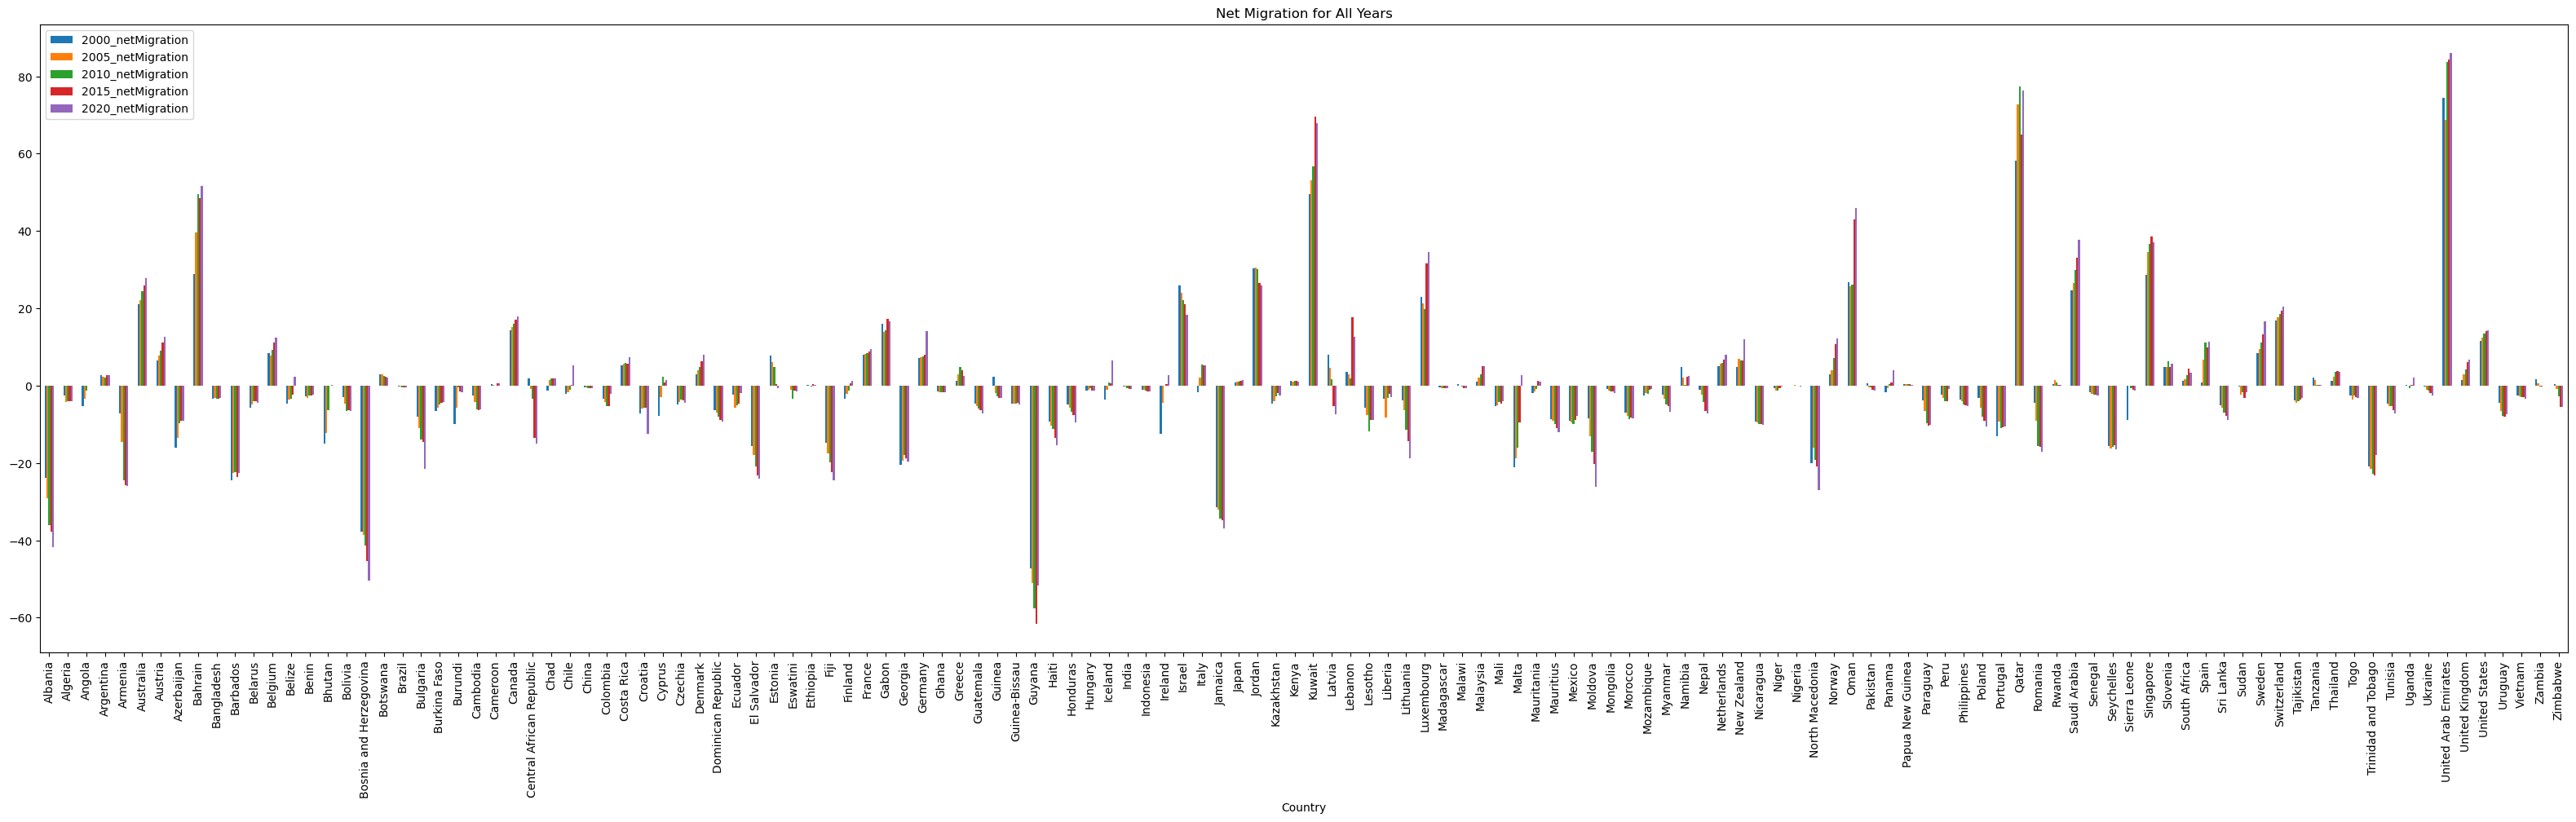

In [69]:
#Graph the net migration for ALL YEARS
final_df.plot(kind='bar', x='Country', y=['2000_netMigration', '2005_netMigration', '2010_netMigration', '2015_netMigration', '2020_netMigration'], figsize=(40,10))
plt.title('Net Migration for All Years')

In [70]:
#Listing the top 10 countries with the highest and lowest average net migration and creating a new dataframe with just Country and average net migration
final_df['average_netMigration'] = final_df[['2000_netMigration', '2005_netMigration', '2010_netMigration', '2015_netMigration', '2020_netMigration']].mean(axis=1)
avg_netMigration_df = final_df[['Country', 'average_netMigration']].sort_values(by='average_netMigration', ascending=False).reset_index(drop=True)
display(avg_netMigration_df.head(10))
display(avg_netMigration_df.tail(10))


,Country,average_netMigration
0,United Arab Emirates,79.505121
1,Qatar,69.896544
2,Kuwait,59.373557
3,Bahrain,43.611172
4,Singapore,35.161322
5,Oman,33.535673
6,Saudi Arabia,30.418195
7,Jordan,28.694383
8,Luxembourg,26.085322
9,Australia,24.247640


,Country,average_netMigration
126,Armenia,-19.561999
127,Fiji,-19.808356
128,El Salvador,-20.337592
129,North Macedonia,-20.600713
130,Trinidad and Tobago,-21.287778
131,Barbados,-23.139515
132,Albania,-33.743572
133,Jamaica,-33.954026
134,Bosnia and Herzegovina,-42.674842
135,Guyana,-53.874935


### Observation
Interestingly, the USA is not listed in the top 10 with regards to net migration. The top of the list is comprised of countries with either a very high standard of living or are neighboring countries that have high emigration rates. 

In [71]:
#Listing the top and bottom 10 countries with regards to average economic freedom score and creating a new dataframe with just Country and average efScore
final_df['average_efScore'] = final_df[['2000_efScore', '2005_efScore', '2010_efScore', '2015_efScore', '2020_efScore']].mean(axis=1)
efScore_avg = final_df[['Country', 'average_efScore']].sort_values(by='average_efScore', ascending=False).reset_index(drop=True)
display(efScore_avg.head(10))
display(efScore_avg.tail(10))

,Country,average_efScore
0,Singapore,8.696
1,New Zealand,8.664
2,Switzerland,8.588
3,United States,8.410
4,United Kingdom,8.194
5,Australia,8.178
6,Canada,8.170
7,Ireland,8.150
8,Denmark,8.142
9,Finland,8.034


,Country,average_efScore
126,Burundi,5.066
127,Ethiopia,5.028
128,Chad,5.026
129,Guinea-Bissau,4.986
130,Algeria,4.968
131,Angola,4.662
132,Central African Republic,4.658
133,Myanmar,4.522
134,Sudan,4.254
135,Zimbabwe,4.250


### Observation
The only country common to both net migration and economic freedom is Australia. Otherwise there does not appear to be any correlation with the top and bottom 10.

Text(0.5, 1.0, '2000 Net Migration vs Economic Freedom Score')

<Figure size 640x480 with 0 Axes>

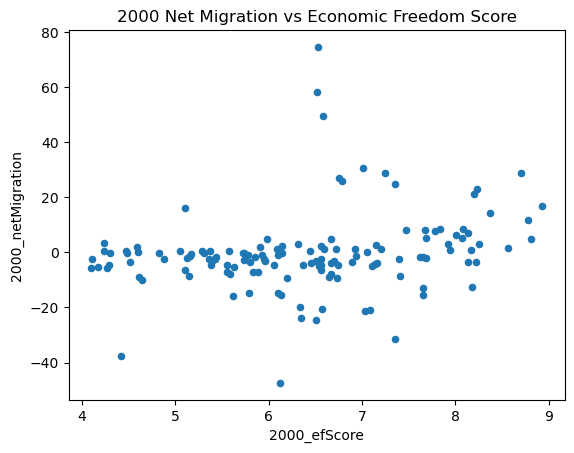

In [72]:
#Plotting net migration for 2000 vs efScore
plt.clf()
final_df.plot(kind='scatter', y='2000_netMigration', x='2000_efScore')
plt.title('2000 Net Migration vs Economic Freedom Score')


Text(0.5, 1.0, '2010 Net Migration vs Economic Freedom Score')

<Figure size 640x480 with 0 Axes>

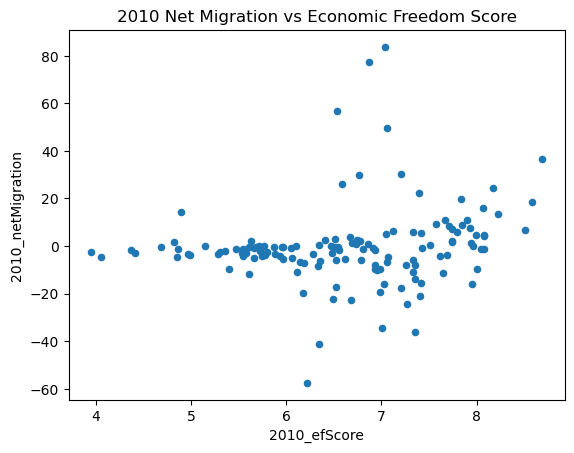

In [73]:
#Plotting net migration for 2010 vs efScore
plt.clf()
final_df.plot(kind='scatter', y='2010_netMigration', x='2010_efScore')
plt.title('2010 Net Migration vs Economic Freedom Score')


Text(0.5, 1.0, '2020 Net Migration vs Economic Freedom Score')

<Figure size 640x480 with 0 Axes>

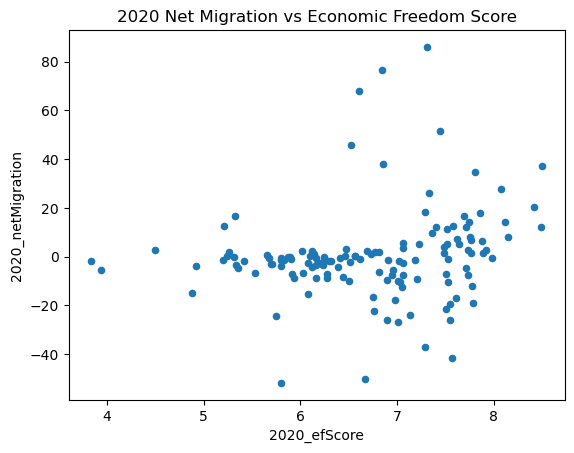

In [74]:
#Plotting net migration for 2020 vs efScore
plt.clf()
final_df.plot(kind='scatter', y='2020_netMigration', x='2020_efScore')
plt.title('2020 Net Migration vs Economic Freedom Score')


### Analysis

The three scatter plots above illustrate the relationship between net migration and economic freedom scores for the years 2000, 2010, and 2020. 

1. **2000 Net Migration vs Economic Freedom Score**: The scatter plot for the year 2000 shows a weak positive correlation between net migration and economic freedom scores. Countries with above average economic freedom scores tend to have higher net migration rates, but the relationship is not very strong.

2. **2010 Net Migration vs Economic Freedom Score**: The scatter plot for the year 2010 also indicates a weak positive correlation. It should be noted that there appears to be an increase of scores in general. 

3. **2020 Net Migration vs Economic Freedom Score**: The scatter plot for the year 2020 displays what appears to be even higher scores on average. Countries with higher economic freedom scores are more likely to have higher net migration rates. But many countries with high scores also have very low net migration rates. This, again does not show a strong correlation between high economic freedom scores and increased net migration. 


In [76]:
#Make the country column a string
final_df['Country'] = final_df['Country'].astype(str)


In [77]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               136 non-null    object 
 1   2000_immigrants       136 non-null    float64
 2   2005_immigrants       136 non-null    float64
 3   2010_immigrants       136 non-null    float64
 4   2015_immigrants       136 non-null    float64
 5   2020_immigrants       136 non-null    float64
 6   2000_emigrants        136 non-null    float64
 7   2005_emigrants        136 non-null    float64
 8   2010_emigrants        136 non-null    float64
 9   2015_emigrants        136 non-null    float64
 10  2020_emigrants        136 non-null    float64
 11  2000_efScore          136 non-null    float64
 12  2005_efScore          136 non-null    float64
 13  2010_efScore          136 non-null    float64
 14  2015_efScore          136 non-null    float64
 15  2020_efScore          1

In [79]:
#set country as index
final_df.set_index('Country', inplace=True)

In [81]:
final_df.head()

,2000_immigrants,2005_immigrants,2010_immigrants,2015_immigrants,2020_immigrants,2000_emigrants,2005_emigrants,2010_emigrants,2015_emigrants,2020_emigrants,...,2010_efScore,2015_efScore,2020_efScore,2000_netMigration,2005_netMigration,2010_netMigration,2015_netMigration,2020_netMigration,average_netMigration,average_efScore
Country,,,,,,,,,,,,,,,,,,,,,
Albania,2.450910,2.097278,1.790484,1.800054,1.696087,26.346346,31.295479,37.921608,39.537610,43.451630,...,7.35,7.64,7.57,-23.895436,-29.198201,-36.131124,-37.737556,-41.755543,-33.743572,7.210
Algeria,0.805709,0.596470,0.603900,0.602781,0.570974,3.343783,4.825522,4.600838,4.622687,4.611833,...,4.99,4.68,4.92,-2.538074,-4.229052,-3.996937,-4.019906,-4.040859,-3.764966,4.968
Angola,0.281224,0.320738,1.440159,2.267140,1.997288,5.569866,3.688281,2.788903,2.217327,2.032680,...,4.86,5.25,5.31,-5.288642,-3.367543,-1.348744,0.049813,-0.035392,-1.998102,4.662
Argentina,4.177341,4.304544,4.416001,4.843368,5.048542,1.506726,2.070533,2.295199,2.191141,2.381081,...,5.63,4.95,4.50,2.670615,2.234011,2.120802,2.652227,2.667462,2.469023,5.652
Armenia,21.432781,15.737932,7.338337,6.535469,6.423691,28.575348,30.210295,31.871496,32.285110,32.335957,...,7.27,7.43,7.55,-7.142567,-14.472363,-24.533159,-25.749641,-25.912266,-19.561999,7.020


In [80]:
#create correlation matrix
correlation_df = final_df[['2000_netMigration', '2000_efScore', '2005_netMigration', '2005_efScore', '2010_netMigration', '2010_efScore', '2015_netMigration', '2015_efScore', '2020_netMigration', '2020_efScore']].corr()
correlation_df

,2000_netMigration,2000_efScore,2005_netMigration,2005_efScore,2010_netMigration,2010_efScore,2015_netMigration,2015_efScore,2020_netMigration,2020_efScore
2000_netMigration,1.000000,0.234475,0.984072,0.146176,0.965122,0.158231,0.950438,0.091378,0.932570,0.147990
2000_efScore,0.234475,1.000000,0.264062,0.911345,0.263323,0.820086,0.265260,0.800661,0.298232,0.785510
2005_netMigration,0.984072,0.264062,1.000000,0.166861,0.990968,0.182990,0.972815,0.118807,0.961165,0.174207
2005_efScore,0.146176,0.911345,0.166861,1.000000,0.160752,0.929981,0.170661,0.908741,0.193353,0.899395
2010_netMigration,0.965122,0.263323,0.990968,0.160752,1.000000,0.172670,0.983722,0.112374,0.975353,0.169996
2010_efScore,0.158231,0.820086,0.182990,0.929981,0.172670,1.000000,0.179036,0.954381,0.193854,0.919818
2015_netMigration,0.950438,0.265260,0.972815,0.170661,0.983722,0.179036,1.000000,0.118438,0.990262,0.166782
2015_efScore,0.091378,0.800661,0.118807,0.908741,0.112374,0.954381,0.118438,1.000000,0.131404,0.940384
2020_netMigration,0.932570,0.298232,0.961165,0.193353,0.975353,0.193854,0.990262,0.131404,1.000000,0.179643
2020_efScore,0.147990,0.785510,0.174207,0.899395,0.169996,0.919818,0.166782,0.940384,0.179643,1.000000


### Analysis

The correlation matrix provides insights into the relationships between net migration and economic freedom scores across different years. Here are the key observations:

**Net Migration and Economic Freedom Score Correlations:**
    - The correlations between net migration and economic freedom scores are generally positive but not very strong. For example, the correlation between `2000_netMigration` and `2000_efScore` is 0.234, indicating a weak positive relationship. This suggests that while there is some association between higher economic freedom and higher net migration, it is not a strong predictor.

**Year-Specific Observations:**
    - The correlation between `2020_netMigration` and `2020_efScore` is 0.179, which is slightly higher than the correlation for earlier years. This could indicate a trend where economic freedom is becoming a more significant factor in net migration decisions over time. But the correlation is still relatively weak, suggesting that other factors also play a role. This year also saw a increase in number of countries with low net migration and high economic freedom scores.
